<a href="https://colab.research.google.com/github/jonathanahc/PLN_Practicas/blob/main/Agrupamiento_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from collections import Counter
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [35]:
nltk.download("stopwords", quiet=True)

True

**Carga y preparación de datos**

In [36]:
dataset = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))
docs_raw = dataset.data

**Eliminación de signos de puntuación**

In [37]:
stopword = set(stopwords.words("english"))
punct = str.maketrans("", "", string.punctuation)

**Conversión a minúsculas**

In [38]:
def normalize_text (text: str, punct) -> str:
  text = text.lower()
  text = text.translate(punct)
  text = re.sub(r"\s+", " ", text).strip()
  return text

**Tokenización y eliminación de stopwords en inglés**

In [39]:
def tokenize (text: str, stopword):
  tokens = simple_preprocess(text, deacc=True, min_len=2, max_len=30)
  tokens = [t for t in tokens if t not in stopword]
  return tokens

In [40]:
docs_tokens = [tokenize(normalize_text(t, punct), stopword) for t in docs_raw]

**Entrenamiento de embeddings**

In [41]:
w2v = Word2Vec(
  sentences=docs_tokens,
  vector_size=100,
  window=5,
  min_count=5,
  workers=4,
  sg=1,
  negative=10,
  epochs=10,
  seed=42
)

# **Clustering con KMeans**

**Entrenamiento de  K-Means utilizando los embeddings obtenidos**

In [42]:
X = normalize(w2v.wv.vectors, norm="l2", axis=1)

kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
kmeans.fit(X)

for i, label in enumerate(kmeans.labels_):
  print(f"Documento {i}: Clúster {label}")

Documento 0: Clúster 15
Documento 1: Clúster 15
Documento 2: Clúster 15
Documento 3: Clúster 15
Documento 4: Clúster 15
Documento 5: Clúster 15
Documento 6: Clúster 15
Documento 7: Clúster 4
Documento 8: Clúster 4
Documento 9: Clúster 15
Documento 10: Clúster 15
Documento 11: Clúster 15
Documento 12: Clúster 15
Documento 13: Clúster 15
Documento 14: Clúster 12
Documento 15: Clúster 4
Documento 16: Clúster 18
Documento 17: Clúster 15
Documento 18: Clúster 15
Documento 19: Clúster 15
Documento 20: Clúster 15
Documento 21: Clúster 15
Documento 22: Clúster 4
Documento 23: Clúster 4
Documento 24: Clúster 15
Documento 25: Clúster 15
Documento 26: Clúster 0
Documento 27: Clúster 4
Documento 28: Clúster 15
Documento 29: Clúster 17
Documento 30: Clúster 15
Documento 31: Clúster 15
Documento 32: Clúster 6
Documento 33: Clúster 15
Documento 34: Clúster 4
Documento 35: Clúster 2
Documento 36: Clúster 4
Documento 37: Clúster 4
Documento 38: Clúster 4
Documento 39: Clúster 15
Documento 40: Clúster 1

**Determinación de mejor valor de K utilizando:**

*   **Método del Codo (Elbow Method)**




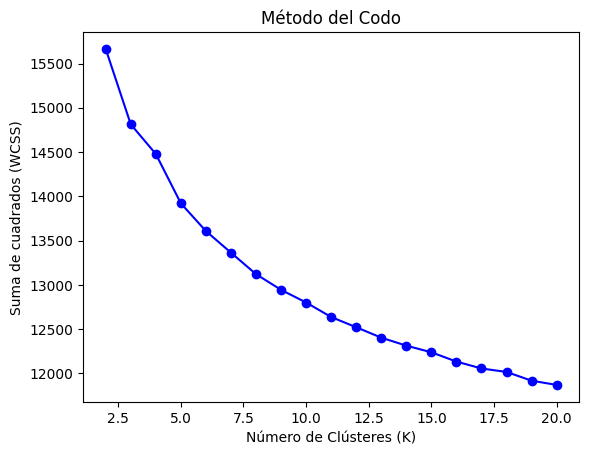

In [45]:
wcss = []
K = range(2, 21)

for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bo-')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Suma de cuadrados (WCSS)')
plt.title('Método del Codo')
plt.show()

*   **Coeficiente de Silhouette**




In [46]:
sil_scores = []

for k in range(2, 21):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(X)
  score = silhouette_score(X, labels)
  sil_scores.append(score)
  print(f"K={k}, Silhouette={round(score, 3)}")

K=2, Silhouette=0.07199999690055847
K=3, Silhouette=0.0729999989271164
K=4, Silhouette=0.07000000029802322
K=5, Silhouette=0.06800000369548798
K=6, Silhouette=0.06700000166893005
K=7, Silhouette=0.06700000166893005
K=8, Silhouette=0.0689999982714653
K=9, Silhouette=0.06800000369548798
K=10, Silhouette=0.06700000166893005
K=11, Silhouette=0.06800000369548798
K=12, Silhouette=0.06400000303983688
K=13, Silhouette=0.052000001072883606
K=14, Silhouette=0.06700000166893005
K=15, Silhouette=0.06599999964237213
K=16, Silhouette=0.061000000685453415
K=17, Silhouette=0.05400000140070915
K=18, Silhouette=0.06499999761581421
K=19, Silhouette=0.0560000017285347
K=20, Silhouette=0.057999998331069946


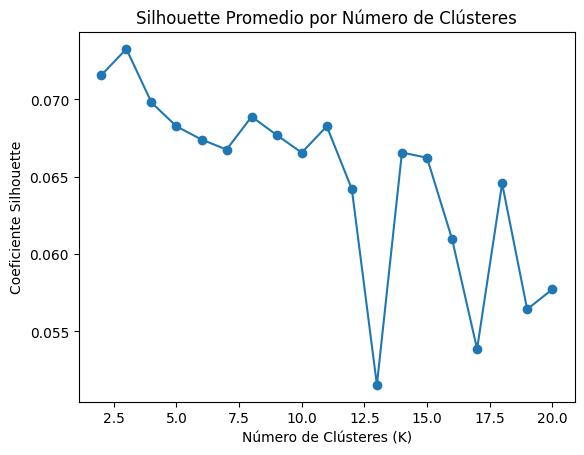

In [47]:
plt.plot(range(2, 21), sil_scores, marker='o')
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Coeficiente Silhouette")
plt.title("Silhouette Promedio por Número de Clústeres")
plt.show()

**Elección de K óptimo:**

El valor óptimo elegido fue 10 debido a que se encontró una estabilidad en los coeficientes según las gráficas.

**Entrenamiento de K-Means usando ese K óptimo.**




In [72]:
results_kmeans = []

K_optimo = 10

kmeans1 = KMeans(n_clusters=K_optimo, random_state=42, n_init=10)
kmeans1.fit(X)
sil = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)
ch = calinski_harabasz_score(X, labels)
results_kmeans.append([K_optimo, sil, dbi, ch])

**Calcula y reporta las métricas:**

*   **Silhouette**
*   **Davies–Bouldin Index (DB)**
*   **Calinski–Harabasz (CH)**

In [73]:
df_results_kmeans = pd.DataFrame(results_kmeans, columns=["K","Silhouette","Davies-Bouldin", "Calinski-Harabasz"])
df_results_kmeans

,K,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,10,0.047543,8.574679,173.691116


# **Clustering con DBSCAN**

**Entrenamiento del modelo DBSCAN utilizando el mismo conjunto de embeddings**

In [59]:
eps_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = [3, 5, 10]

results = []

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s, metric='cosine')
        labels = db.fit_predict(X)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            sil = silhouette_score(X, labels, metric='cosine')
            dbs = davies_bouldin_score(X, labels)
            chs = calinski_harabasz_score(X, labels)

        results.append((eps, min_s, n_clusters, sil, dbs, chs))

**Calcula las mismas métricas internas:**

*   **Silhouette**
*   **Davies–Bouldin Index (DB)**
*   **Calinski–Harabasz (CH)**


In [60]:
df_results = pd.DataFrame(
    results,
    columns=['eps', 'min_samples', 'clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
)
df_results

,eps,min_samples,clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,0.05,3,76,-0.336330,1.240218,17.213120
1,0.05,5,12,-0.200165,1.325363,88.813232
2,0.05,10,4,-0.113708,1.422347,249.141602
3,0.10,3,142,-0.421515,1.429174,14.935261
4,0.10,5,37,-0.354669,1.539472,46.943394
5,0.10,10,16,-0.294986,1.730973,104.630508
6,0.15,3,109,-0.431149,1.645974,9.593107
7,0.15,5,25,-0.320569,1.937823,34.088436
8,0.15,10,4,-0.107937,3.244288,256.665161
9,0.20,3,40,-0.297887,1.944317,12.862580


# **Comparación de resultados**

In [71]:
df = pd.concat([df_results_kmeans, df_results])

column_order = ["Modelo", "K", "eps", "min_samples", "clusters", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"]

df["Modelo"] = df.apply(lambda row: "K-Means" if pd.notna(row["K"]) else "DBSCAN", axis=1)

df = df.reindex(columns=column_order)
df = df.sort_values(by=["Modelo", "K", "eps"], ascending=[False, True, True])
df = df.reset_index(drop=True)

df

,Modelo,K,eps,min_samples,clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,K-Means,10.0,NaN,NaN,NaN,0.047543,8.574679,173.691116
1,DBSCAN,NaN,0.05,3.0,76.0,-0.336330,1.240218,17.213120
2,DBSCAN,NaN,0.05,5.0,12.0,-0.200165,1.325363,88.813232
3,DBSCAN,NaN,0.05,10.0,4.0,-0.113708,1.422347,249.141602
4,DBSCAN,NaN,0.10,3.0,142.0,-0.421515,1.429174,14.935261
5,DBSCAN,NaN,0.10,5.0,37.0,-0.354669,1.539472,46.943394
6,DBSCAN,NaN,0.10,10.0,16.0,-0.294986,1.730973,104.630508
7,DBSCAN,NaN,0.15,3.0,109.0,-0.431149,1.645974,9.593107
8,DBSCAN,NaN,0.15,5.0,25.0,-0.320569,1.937823,34.088436
9,DBSCAN,NaN,0.15,10.0,4.0,-0.107937,3.244288,256.665161


**Conclusión técnica:**

Ninguna configuración de KMeans generó más de un clúster, lo que hace que la comparación de métricas con DBSCAN (que sí encontró múltiples clústeres) no sea directamente comparable ni significativa.

Para lograr una comparación significativa con DBSCAN, se requeriría un análisis más exhaustivo o un ajuste de parámetros para KMeans.

# **Visualizaciones**

**PCA mostrando los clusters de K-Means**


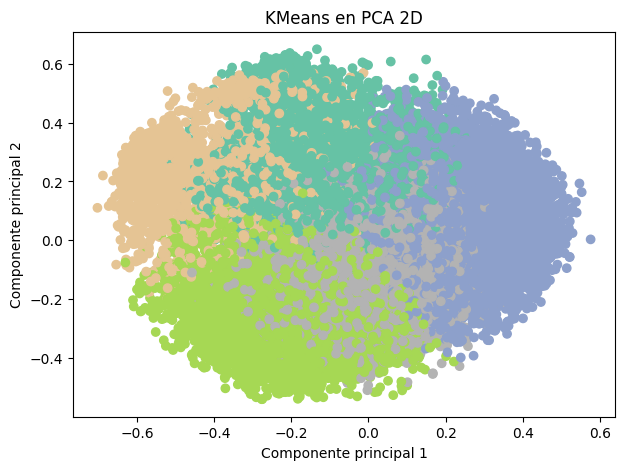

In [67]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='Set2')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('KMeans en PCA 2D')
plt.show()

**PCA mostrando los clusters de DBSCAN**

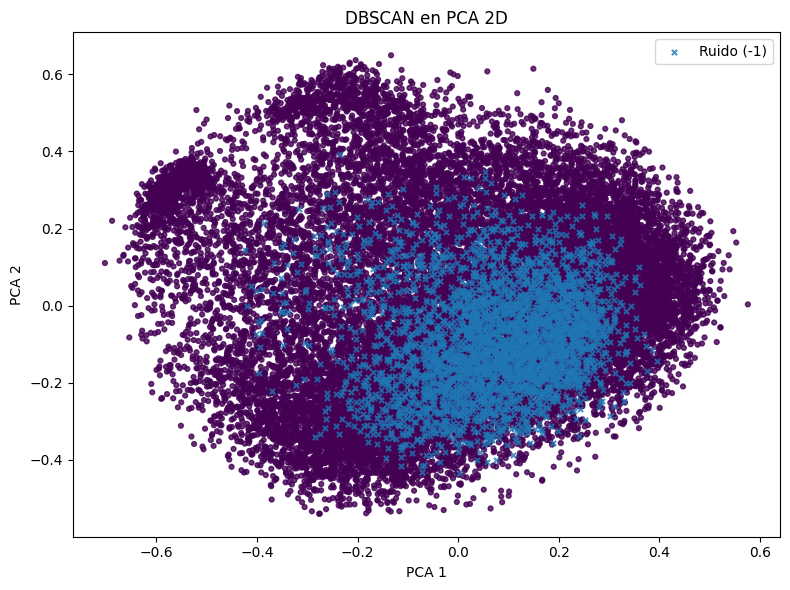

In [68]:
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

plt.figure(figsize=(8,6))
mask_clusters = labels != -1
plt.scatter(X2[mask_clusters, 0], X2[mask_clusters, 1],
            c=labels[mask_clusters], s=12, alpha=0.8)

mask_noise = ~mask_clusters
if mask_noise.any():
    plt.scatter(X2[mask_noise, 0], X2[mask_noise, 1],
                s=14, alpha=0.8, marker='x', label='Ruido (-1)')

plt.title(f"DBSCAN en PCA 2D")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

**Wordcloud**

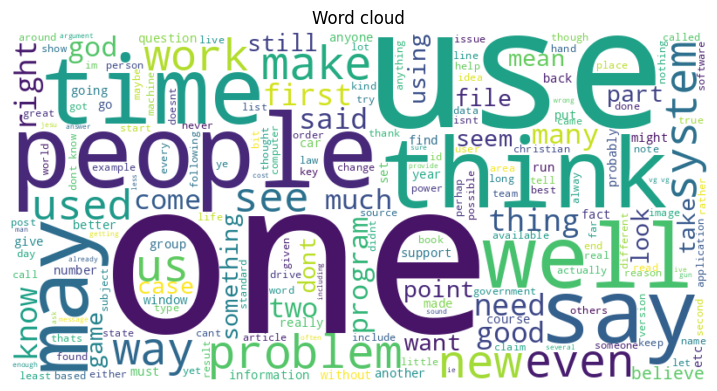

In [69]:
texto_tokens = ' '.join([' '.join(doc) for doc in docs_tokens])
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(texto_tokens)
plt.figure(figsize=(9, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud')
plt.show()